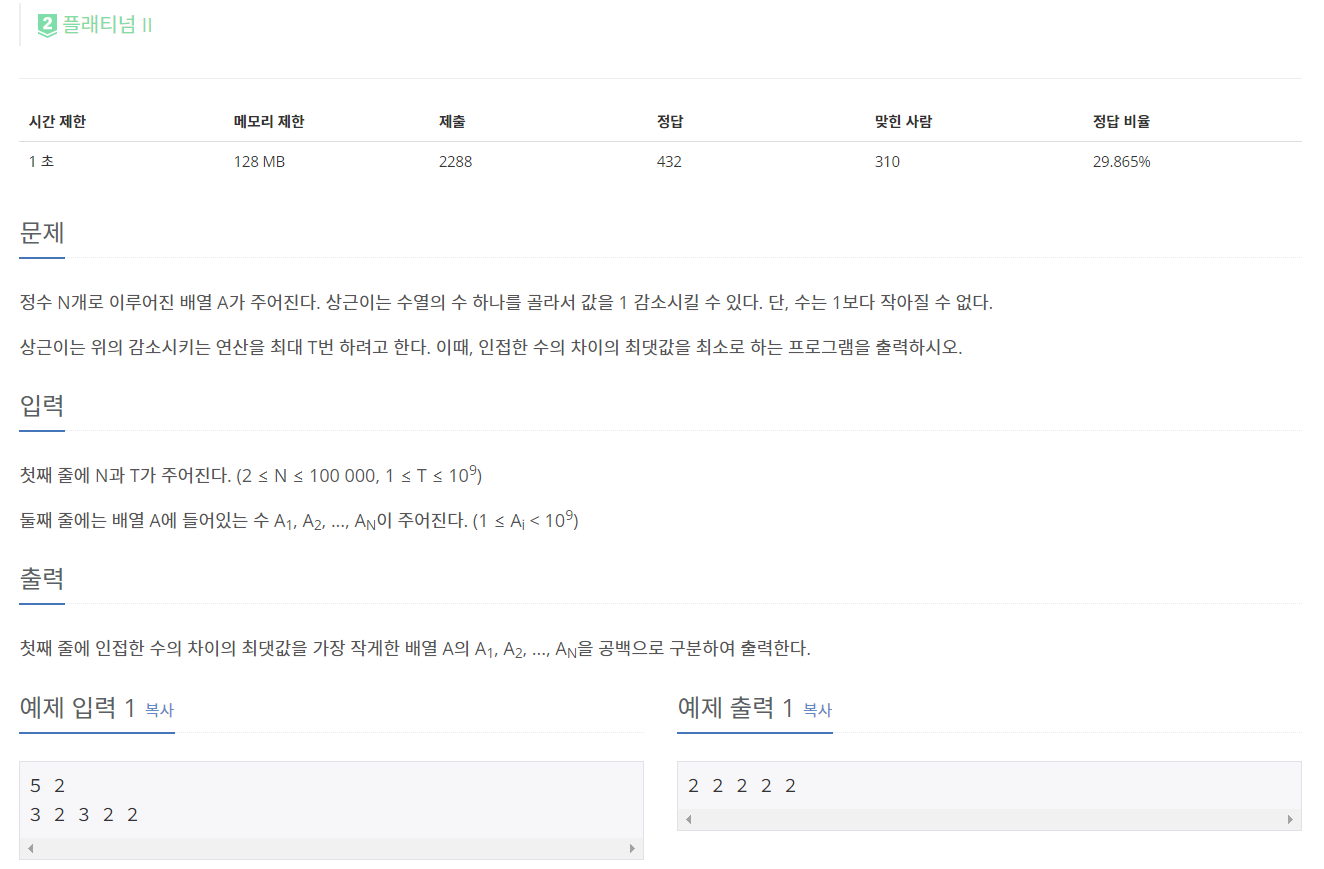

In [1]:
from IPython.display import Image
Image('images/차이최소.png')

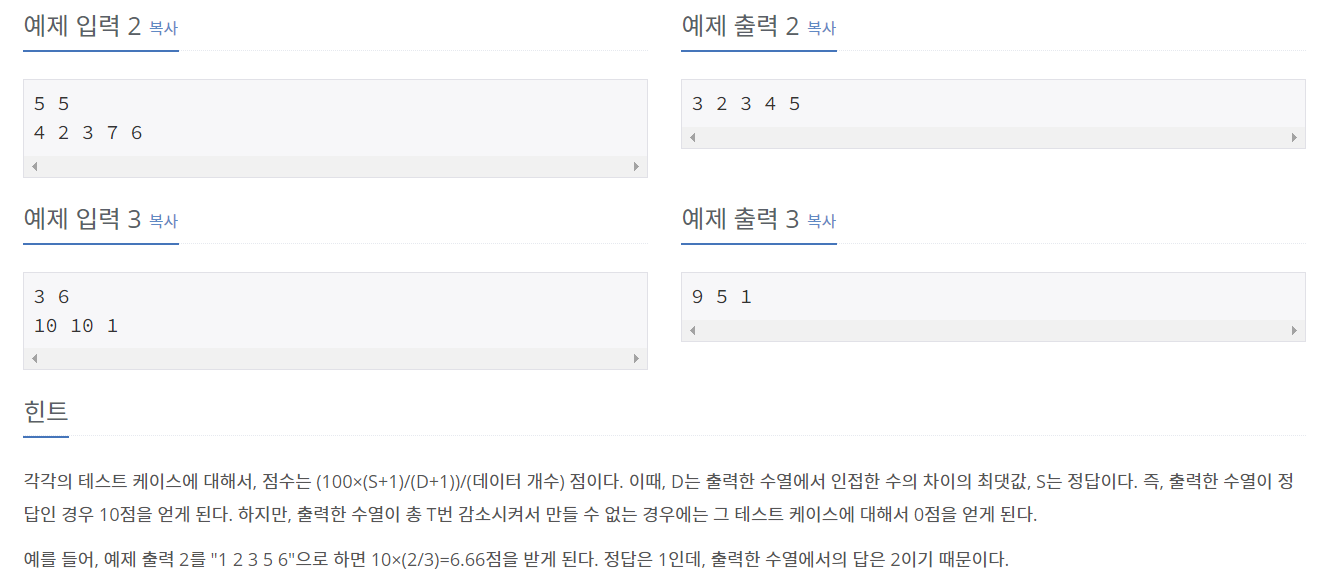

In [2]:
from IPython.display import Image
Image('images/차이최소2.png')

**차이의 최댓값을 X이하로 만들기 위해 연산이 적어도 몇 개 필요한가?**
- 예제2. [4, 2, 3, 7, 6] 배열에서 '인접한 수의 차이의 최댓값 후보는 0~7
- 0~7 사이의 중위값 7//2 = 3이므로 X=3이라 생각하고 아래의 2가지를 거쳐 배열 재생성
- **1. 왼쪽에서 오른쪽 (왼쪽<<오른쪽)** : [4, 2, 3, 6, 6] 이 되고 연산(T) = 1
- **2. 오른쪽에서 왼쪽 (왼쪽>>오른쪽)** : [4, 2, 3, 6, 6] 동일 
- 차이의 최댓값을 3이하로 만들기 위한 연산은 1번 밖에 필요하지 않음

- 0~2 사이의 중위값 1이므로 X=1
- **1.왼쪽에서 오른쪽** : [4, 2, 3, 4, 5] +3 +1 -> T=4
- **2.오른쪽에서 왼쪽** : [3, 2, 3, 4, 5] +1 -> T=1
- 차이의 최댓값을 1이하로 만들기 위한 연산 5가 필요함
- T는 5이기에 해당 배열 [3, 2, 3, 4, 5]가 정답 -> 출력

In [21]:
N, T = map(int, input(). split())
A = list(map(int, input().split()))

def needed_num(x:int) -> int:
    # 차이의 최댓값를 x 이하로 만들기 위해 필요한 연산의 횟수를 구하는 함수
    
    B = [A[i] for i in range(N)]
    
    cnt = 0
    for i in range(N-1): # B[0], B[1], B[2], B[3] 
                            # B[4] -> i+1 index와 겹치지 않으려고 range(N-1)
            
        if B[i] + x < B[i+1]: # 왼쪽수와 x를 더한 값보다 오른쪽 값이 클 때
            cnt += B[i+1] - B[i] - x   # 7 - 3 - 1 = 3
            B[i+1] = B[i] + x # 오른쪽 값은 왼쪽 값과 3차이
            
            
    for i in range(N-1, 0, -1): # B[4], B[3], B[2], B[1]
                                    # B[0] -> i-1 index와 겹치지 않으려고 range(N-1,0,-1)
        if B[i] + x < B[i-1]:
            cnt += B[i-1] - B[i]- x
            B[i-1] = B[i] + x
    
    return cnt

low = 0
high = max(A)
answer = -1

# 이분 검색
while low <= high:
    mid = (low + high) // 2
    
    if needed_num(mid) <= T:
        answer = mid
        high = mid - 1
    else:
        low = mid + 1
        

# 배열 출력        
# need_num 함수와 겹치긴 하지만, 해당 건은 횟수만을 구하는 함수
# 아래는 배열만을 구하는 함수

for i in range(N-1):
    if A[i] + answer < A[i+1]:
        A[i+1] = A[i] + answer
        
for i in range(N-1, 0, -1):
    if A[i] + answer < A[i-1]:
        A[i-1] = A[i] + answer
        

print(" ".join(list(map(str, A)))) # 문자열로 출력(띄어쓰기로 숫자 구분)

5 5
4 2 3 7 6
3 2 3 4 5


드디어 풀었다..!!!🤣 플래티넘 문제부터는 점수로 뜨는구나...

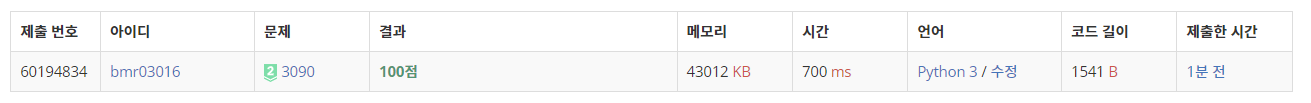

In [23]:
from IPython.display import Image
Image('images/차이최소3.png')

📍 주의
- B[i+1] 를 쓸 때, 인덱스 오류 발생 -> range(N-1) : 조금 더 꼼꼼히 살피자!